# EDAのノートブック

In [56]:
import sys
import os
from pathlib import Path

sys.path.append(os.path.join(Path().resolve(), '..'))

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

from utils.utils import make_datapath_list

In [30]:
datapath = "../data/"
train_files = make_datapath_list(os.path.join(datapath, "train"))
test_files = make_datapath_list(os.path.join(datapath, "test"))

../data/train/**/*.tif
../data/test/**/*.tif


(1024, 1024, 3)


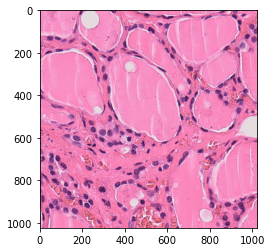

In [31]:
img = Image.open(train_files[0])
img = np.array(img)
print(img.shape)
plt.imshow(img)

In [93]:
def file2img(files):
    imgs = None
    i = 0
    for i,file in enumerate(files):
        img = Image.open(file)
        img = np.array(img)[np.newaxis, :, :, :]
        if (1024 != img.shape[1]) or (1024 != img.shape[2]):
            i += 1
            continue
        if imgs is None:
            imgs = img
        else:
            imgs = np.vstack([imgs, img])
    print("not_1024_num", i)
    return imgs

In [ ]:
train_imgs = file2img(train_files)
print(train_imgs.shape)

In [ ]:
test_imgs = file2img(test_files)
print(test_imgs.shape)

In [ ]:
tissue_files = make_datapath_list("../data/tissue array/")
tissue_imgs = file2img(tissue_files)
print(tissue_imgs.shape)

In [ ]:
train_mean = train_imgs.mean(axis=(0, 1, 2))
test_mean = test_imgs.mean(axis=(0, 1, 2))
tissue_mean = tissue_imgs.mean(axis=(0, 1, 2))

print("train_mean(r,g,b):", train_mean)
print("test_mean(r,g,b):", test_mean)
print("tissue_mean(r,g,b):", tissue_mean)

In [ ]:
train_std = train_imgs.std(axis=(0, 1, 2))
test_std = test_imgs.std(axis=(0, 1, 2))
tissue_std = tissue_imgs.std(axis=(0, 1, 2))

print("train_std(r,g,b):", train_std)
print("test_std(r,g,b):", test_std)
print("tissue_std(r,g,b):", tissue_std)